In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r'D:\swastik\ML\datasets\FuelConsumption (linear regression).csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df['CO2EMISSIONS'].value_counts()

CO2EMISSIONS
294    25
230    22
225    21
209    20
196    19
       ..
195     1
437     1
213     1
370     1
124     1
Name: count, Length: 159, dtype: int64

array([[<Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

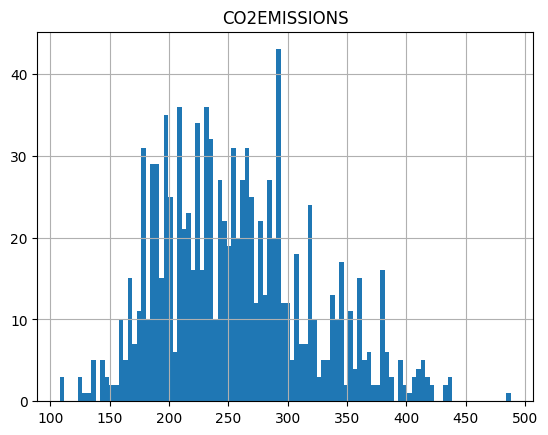

In [11]:
df.hist(column='CO2EMISSIONS',bins=100)

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

In [23]:
X=np.asanyarray(df[['FUELCONSUMPTION_CITY'	,'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'	
      ,'FUELCONSUMPTION_COMB_MPG']])   
#X=df[[]].values
X

array([[ 9.9,  6.7,  8.5, 33. ],
       [11.2,  7.7,  9.6, 29. ],
       [ 6. ,  5.8,  5.9, 48. ],
       ...,
       [13.4,  9.8, 11.8, 24. ],
       [12.9,  9.3, 11.3, 25. ],
       [14.9, 10.2, 12.8, 22. ]])

In [29]:
Y=np.asanyarray(df[['CO2EMISSIONS']])
Y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [38]:
Y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

Normalization

In [35]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.82855772, -0.99334135, -0.88430407,  0.87855306],
       [-0.5114328 , -0.63532912, -0.5685715 ,  0.34273362],
       [-1.77993246, -1.31555236, -1.63058106,  2.88787597],
       ...,
       [ 0.02524013,  0.11649658,  0.06289365, -0.32704069],
       [-0.09673099, -0.06250954, -0.08062116, -0.19308583],
       [ 0.3911535 ,  0.25970147,  0.34992326, -0.59495041]])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print('Train set : ',x_train.shape,y_train.shape)
print('test set : ',x_test.shape,y_test.shape)

Train set :  (853, 4) (853, 1)
test set :  (214, 4) (214, 1)


In [39]:
y_train, y_test=y_train.ravel(), y_test.ravel()
print('Train set : ',x_train.shape,y_train.shape) #should be (214,)
print('test set : ',x_test.shape,y_test.shape)

Train set :  (853, 4) (853,)
test set :  (214, 4) (214,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
k=4
model=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

# prediction

In [42]:
y_hat=model.predict(x_test)

evaluation

In [44]:
print('train accc :',metrics.accuracy_score(y_train,model.predict(x_train)))
print('test acc: ',metrics.accuracy_score(y_test,y_hat))

train accc : 0.7303634232121923
test acc:  0.514018691588785
